# Import Modules

In [1]:
import cv2
import numpy as np
import skimage.util
import matplotlib.pyplot as plt

from PIL import Image, ImageOps

***
# Initialize and load original image

In [2]:
# raw_image = cv2.imread('../images/lenna.png')
# raw_image = cv2.imread('../images/cameraman.png')
raw_image = cv2.imread('../images/edin_castle.png')
# raw_image = cv2.imread('../images/bowl_fruit.png')
# raw_image = cv2.imread('../images/peppers.png')
# raw_image = cv2.imread('../images/map_of_spain.png')

img_rgb = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)

***
# Display original image and description

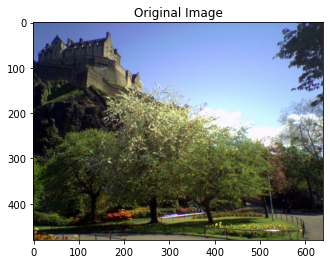

Height        : 480 pixels
Width         : 640 pixels
Color channel : 3 (RGB)


In [3]:
plt.imshow(img_rgb)
plt.title('Original Image')
plt.show()

height, width, color_channel = img_rgb.shape

print(f'Height        : {height} pixels')
print(f'Width         : {width} pixels')
print(f'Color channel : {color_channel} (RGB)')

***
# Display original image histogram

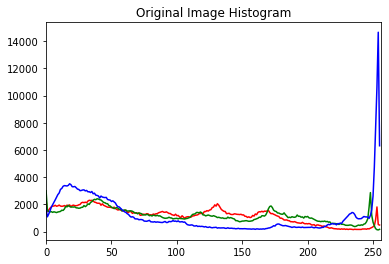

In [4]:
color = ('r', 'g', 'b') 

for i, col in enumerate(color): 
    histr = cv2.calcHist([img_rgb], 
                         [i], None,
                         [256],
                         [0, 256])

    plt.plot(histr, color = col)
    plt.xlim([0, 256])

plt.title('Original Image Histogram')
plt.show()

***
# Show array value each pixel

In [5]:
img_rgb

array([[[ 71, 107, 165],
        [ 73, 108, 166],
        [ 74, 108, 167],
        ...,
        [ 40,  31,  50],
        [ 49,  31,  47],
        [ 53,  30,  43]],

       [[ 78, 108, 168],
        [ 78, 106, 166],
        [ 78, 106, 166],
        ...,
        [ 35,  32,  47],
        [ 41,  33,  47],
        [ 43,  32,  44]],

       [[ 83, 107, 168],
        [ 81, 105, 166],
        [ 80, 104, 166],
        ...,
        [ 31,  37,  48],
        [ 37,  41,  52],
        [ 39,  41,  52]],

       ...,

       [[ 76,  61,  11],
        [ 69,  66,  19],
        [ 57,  68,  22],
        ...,
        [114, 117,  95],
        [113, 116,  94],
        [114, 115,  94]],

       [[ 72,  38,   0],
        [ 66,  46,   8],
        [ 67,  63,  26],
        ...,
        [114, 118,  96],
        [115, 118,  95],
        [116, 117,  95]],

       [[ 73,  45,   8],
        [ 68,  54,  19],
        [ 61,  66,  33],
        ...,
        [117, 118,  96],
        [120, 118,  98],
        [122, 119,  98]]

***
# Negative Image

- Nilai intensitas tertinggi akan dikurangi dengan nilai dari setiap piksel pada gambar, sehingga terjadi invert pada nilai pixel awal
- Formula, sebagai berikut <b>x = m - f(x, y)</b>
- <b>m</b> adalah nilai intensitas piksel tertinggi
- <b>f(x, y)</b> adalah fungsi untuk mengambil nilai array dari setiap piksel pada gambar
- Memperjelas detail putih atau abu-abu yang disematkan di wilayah gelap pada gambar

#### - Get height and width of the image

In [6]:
height, width, color_channel = img_rgb.shape
print(f'Height : {height} pixels')
print(f'Width  : {width} pixels')

Height : 480 pixels
Width  : 640 pixels


#### - Change value each pixel with algorithm

- <b>Method-1</b>

In [7]:
img_negative = img_rgb

for i in range(0, height - 1): 
    for j in range(0, width - 1):
        # Get the pixel value 
        pixel = img_negative[i, j]

        # Negate each channel by  
        # subtracting it from 255

        # 1st index contains red pixel
        pixel[0] = 255 - pixel[0]
          
        # 2nd index contains green pixel
        pixel[1] = 255 - pixel[1]
          
        # 3rd index contains blue pixel
        pixel[2] = 255 - pixel[2] 
          
        # Store new values in the pixel
        img_negative[i, j] = pixel

- <b>Method 2 (Optimization)<b>

In [8]:
# img_negative = 255 - img_rgb

#### - Show array value each pixel

In [9]:
img_negative

array([[[184, 148,  90],
        [182, 147,  89],
        [181, 147,  88],
        ...,
        [215, 224, 205],
        [206, 224, 208],
        [ 53,  30,  43]],

       [[177, 147,  87],
        [177, 149,  89],
        [177, 149,  89],
        ...,
        [220, 223, 208],
        [214, 222, 208],
        [ 43,  32,  44]],

       [[172, 148,  87],
        [174, 150,  89],
        [175, 151,  89],
        ...,
        [224, 218, 207],
        [218, 214, 203],
        [ 39,  41,  52]],

       ...,

       [[179, 194, 244],
        [186, 189, 236],
        [198, 187, 233],
        ...,
        [141, 138, 160],
        [142, 139, 161],
        [114, 115,  94]],

       [[183, 217, 255],
        [189, 209, 247],
        [188, 192, 229],
        ...,
        [141, 137, 159],
        [140, 137, 160],
        [116, 117,  95]],

       [[ 73,  45,   8],
        [ 68,  54,  19],
        [ 61,  66,  33],
        ...,
        [117, 118,  96],
        [120, 118,  98],
        [122, 119,  98]]

#### - Display the negative transformed image

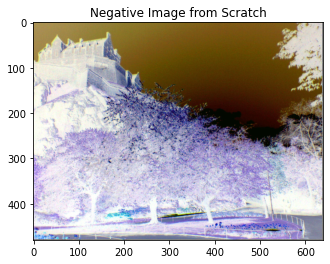

In [10]:
plt.imshow(img_negative)
plt.title('Negative Image from Scratch')
plt.show()

#### - Histogram

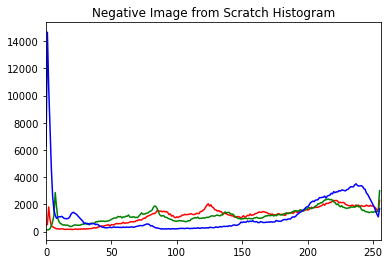

In [11]:
color = ('r', 'g', 'b')
  
for i, col in enumerate(color):
    histr = cv2.calcHist([img_negative], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])

plt.title('Negative Image from Scratch Histogram')
plt.show()

***
# With image processing module

### - Initialize and load original image

In [12]:
img_raw = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)

### - Display original image

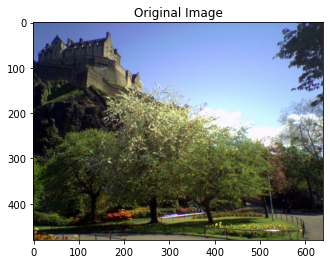

In [13]:
plt.imshow(img_raw)
plt.title('Original Image')
plt.show()

### - Negative image with scikit-image module

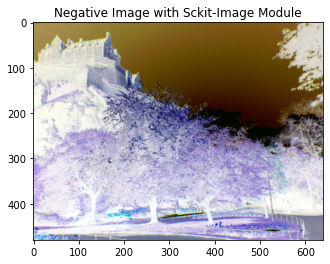

In [14]:
plt.imshow(skimage.util.invert(img_raw))
plt.title('Negative Image with Sckit-Image Module')
plt.show()

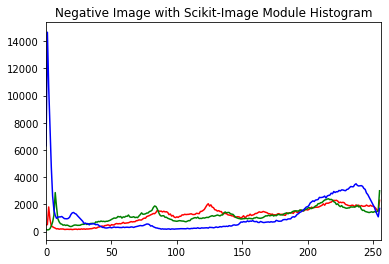

In [15]:
color = ('r', 'g', 'b')
  
for i, col in enumerate(color):
    histr = cv2.calcHist([skimage.util.invert(img_raw)], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])
    
plt.title('Negative Image with Scikit-Image Module Histogram')
plt.show()

### - Negative image with Open-CV

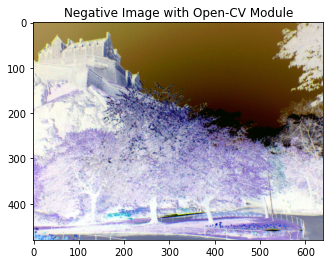

In [16]:
plt.imshow(cv2.bitwise_not(img_raw))
plt.title('Negative Image with Open-CV Module')
plt.show()

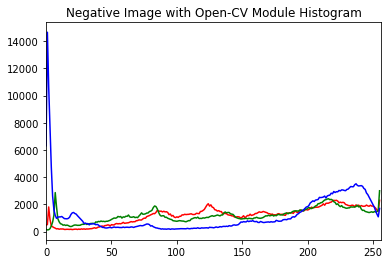

In [17]:
color = ('r', 'g', 'b')
  
for i, col in enumerate(color):
    histr = cv2.calcHist([cv2.bitwise_not(img_raw)], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])

plt.title('Negative Image with Open-CV Module Histogram')
plt.show()

### - Negative image with Pillow module

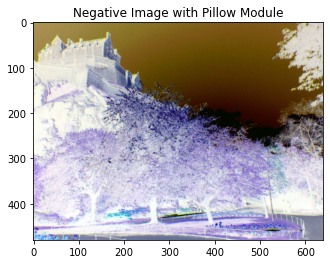

In [18]:
raw_image  = Image.open('../images/edin_castle.png')
img_invert = np.asanyarray(ImageOps.invert(raw_image))

plt.imshow(img_invert)
plt.title('Negative Image with Pillow Module')
plt.show()

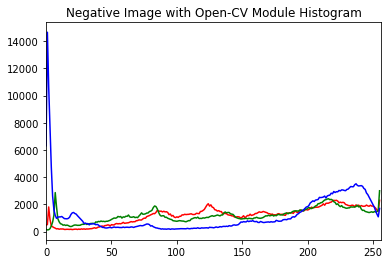

In [19]:
color = ('r', 'g', 'b')
  
for i, col in enumerate(color):
    histr = cv2.calcHist([img_invert], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])

plt.title('Negative Image with Open-CV Module Histogram')
plt.show()